# Lab 11: Deep Learning for Network Performance Prediction using RNNs and LSTMs

This lab focuses on implementing Recurrent Neural Network architectures and LSTM for predicting ercentage of visitors using international roaming in Singapore.

## Data Dictionary
| Feature  | Description  | Data Type |
|-----------------------------|----------------------------------------------|-----------|
| ds                   | Timestamp indicating the month and year of the observation.                          | datetime  |
| y                    | Percentage of visitors using international roaming services during the given month.  | string    |


## Lab Tasks Overview
1. **Data Loading and Initial Analysis**
   - Load and examine the dataset
   - Check for missing values
   - Analyze basic statistics
   
2. **Data Preprocessing**
   - Convert timestamps
   - Feature scaling
   - Sequence preparation
   
3. **Basic RNN Implementation**
   - Create sequences
   - Build simple RNN model
   - Train and evaluate
   
4. **LSTM Implementation**
   - Build LSTM architecture
   - Train and evaluate

Task: 1. **Data Loading and Initial Analysis**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

import tensorflow as tf

In [2]:
# Load the dataset
def load_and_analyze_data(file_path):
    # Read the data
    df = pd.read_csv(file_path)

    # Display basic information
    print("\nDataset Info:")
    print(df.info())

    # Display basic statistics
    print("\nBasic Statistics:")
    print(df.describe())

    # Check missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    return df

In [3]:
# Load the data
df = load_and_analyze_data('/content/InternationRoaming_singapore.csv')



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      204 non-null    object 
 1   y       204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
None

Basic Statistics:
                y
count  204.000000
mean    10.694430
std      5.956998
min      2.814520
25%      5.844095
50%      9.319345
75%     14.289964
max     29.665356

Missing Values:
ds    0
y     0
dtype: int64


In [7]:
# Convert the 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Set 'ds' as the index
df.set_index('ds', inplace=True)

# Display the first few rows of the dataset
df.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


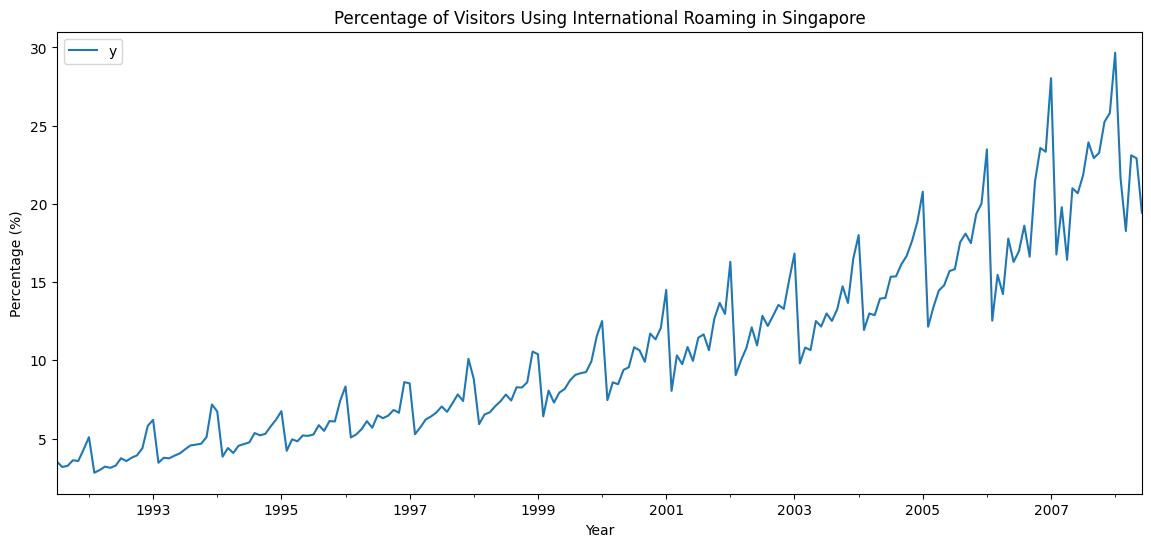

In [8]:
# 1. Plotting the Time Series
df.plot(figsize=(14, 6))
plt.title('Percentage of Visitors Using International Roaming in Singapore')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()


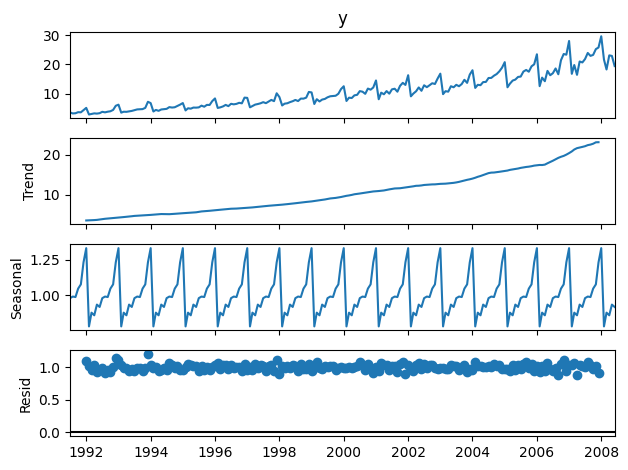

In [11]:
# 2. Decomposing the Time Series
result = seasonal_decompose(df['y'], model='multiplicative', period=12)
result.plot()
plt.show()

Task 2. **Data Preprocessing**

In [38]:
# Create sequences for RNN
def create_sequences(data, seq_length=12):
    """Create sequences for RNN input"""
    X, y = [], []
    data_array = data.values

    for i in range(len(data_array) - seq_length):
        X.append(data_array[i:(i + seq_length)])
        y.append(data_array[i + seq_length, 0])  # Signal Strength is first column

    return np.array(X), np.array(y)

In [39]:

# Process the data
processed_data = df

# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(processed_data)
scaled_df = pd.DataFrame(scaled_data, columns=processed_data.columns)

# Create sequences
seq_length = 10  # We'll predict based on 10 previous measurements
X, y = create_sequences(scaled_df, seq_length)


In [40]:
# Print shapes and basic statistics
print("\nProcessed data shape:", processed_data.shape)
print("Sequence data shape (X):", X.shape)
print("Target data shape (y):", y.shape)



Processed data shape: (204, 1)
Sequence data shape (X): (194, 10, 1)
Target data shape (y): (194,)


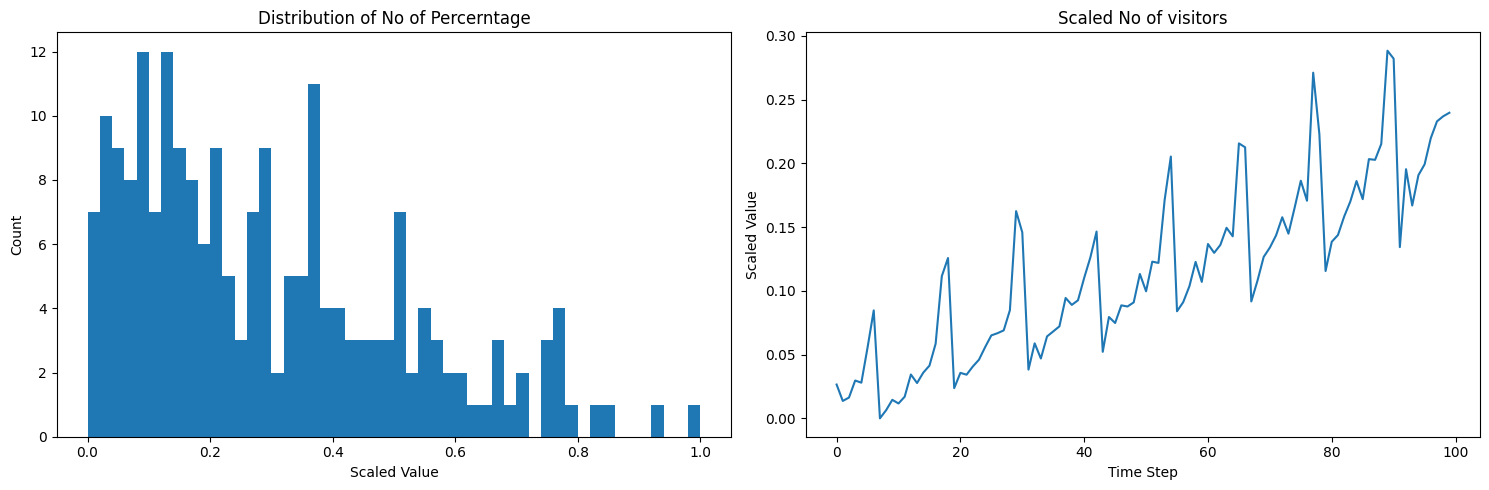

In [41]:
# Plot scaled features distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(scaled_df['y'], bins=50)
plt.title('Distribution of No of Percerntage')
plt.xlabel('Scaled Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.plot(scaled_df['y'].iloc[:100])
plt.title('Scaled No of visitors')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.tight_layout()
plt.show()

In [42]:
# Display sample of the sequence data
print("\nSample sequence (first 5 time steps of first sequence):")
print(X[0][:5])


Sample sequence (first 5 time steps of first sequence):
[[0.02651951]
 [0.01364468]
 [0.01630121]
 [0.02966325]
 [0.02798233]]


# Task 3: Basic RNN Implementation


In [43]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [44]:
# 3.1 Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (155, 10, 1)
Test set shape: (39, 10, 1)


In [45]:
# 3.2 Create and compile the basic RNN model
def create_simple_rnn():
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.SimpleRNN(32, input_shape=(10, 1), activation='tanh',
                                 return_sequences=True),
        tf.keras.layers.Dropout(0.2),

        # Second RNN layer
        tf.keras.layers.SimpleRNN(16, activation='tanh'),
        tf.keras.layers.Dropout(0.2),

        # Output layer
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                 loss='mse',
                 metrics=['mae'])

    return model

In [46]:
# Create model
rnn_model = create_simple_rnn()
print("\nModel Summary:")
rnn_model.summary()


Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 10, 32)              │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# 3.3 Train the model
history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.1687 - mae: 0.3153 - val_loss: 0.0434 - val_mae: 0.1624
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1231 - mae: 0.2564 - val_loss: 0.0640 - val_mae: 0.2080
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1205 - mae: 0.2710 - val_loss: 0.0244 - val_mae: 0.1449
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0719 - mae: 0.2070 - val_loss: 0.1080 - val_mae: 0.2937
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0825 - mae: 0.2235 - val_loss: 0.0568 - val_mae: 0.1911
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0606 - mae: 0.1862 - val_loss: 0.0208 - val_mae: 0.1319
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0430 - mae: 0.1542 - val_loss: 0.0269 - val_mae: 0.1383
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0484 - mae: 0.1734 - val_loss: 0.0174 - val_mae: 0.1167
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0386 - mae: 0.1501 -

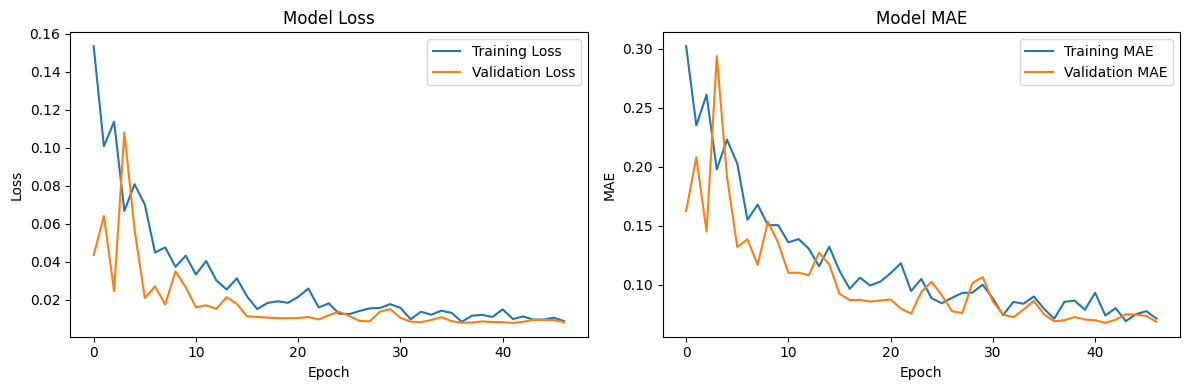

In [48]:
# 3.4 Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


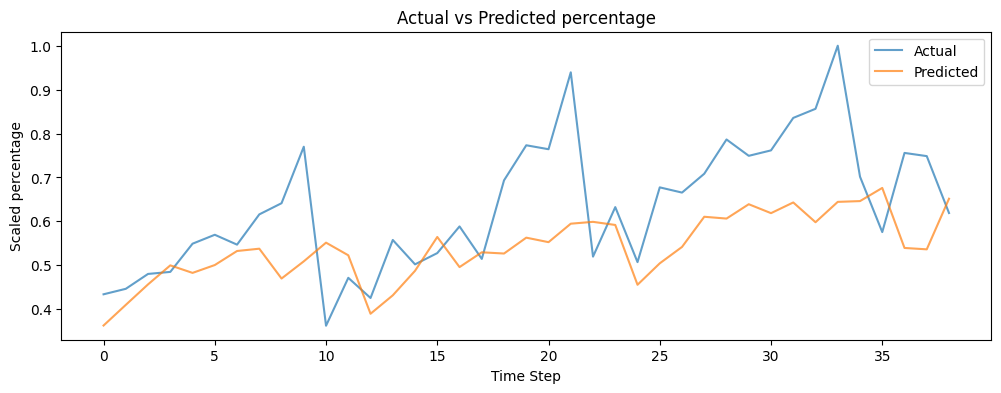

In [49]:
# 3.5 Evaluate model performance
# Make predictions
train_predictions = rnn_model.predict(X_train)
test_predictions = rnn_model.predict(X_test)

# Plot actual vs predicted for test set
plt.figure(figsize=(12, 4))
plt.plot(y_test[:100], label='Actual', alpha=0.7)
plt.plot(test_predictions[:100], label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted percentage')
plt.xlabel('Time Step')
plt.ylabel('Scaled percentage')
plt.legend()
plt.show()

# Task 4: LSTM Implementation


In [64]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [71]:

# Step 1: Data Preparation
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

In [72]:
# Load dataset
data = pd.read_csv('InternationRoaming_singapore.csv')
data.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [73]:
data['ds'] = pd.to_datetime(data['ds'])
values = data['y'].values.reshape(-1, 1)  # Percentage of visitors

# Normalize data
scaler = MinMaxScaler()
values = scaler.fit_transform(values)

In [74]:
# Create sequences
sequence_length = 12  # Using past 12 months for prediction
X, y = create_sequences(values, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [75]:


# Step 2: Model Design
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output, _ = self.lstm(x)
        output = self.fc(output[:, -1, :])  # Only the last output
        return output

In [76]:


# Hyperparameters
input_size = 1
hidden_size = 64
num_layers = 2
output_size = 1
learning_rate = 0.001
epochs = 50

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [70]:
# X_train

In [77]:


# Step 3: Training
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.0512
Epoch [20/50], Loss: 0.0450
Epoch [30/50], Loss: 0.0394
Epoch [40/50], Loss: 0.0257
Epoch [50/50], Loss: 0.0093


In [78]:
# Step 4: Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predictions = scaler.inverse_transform(predictions.numpy())
    actuals = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

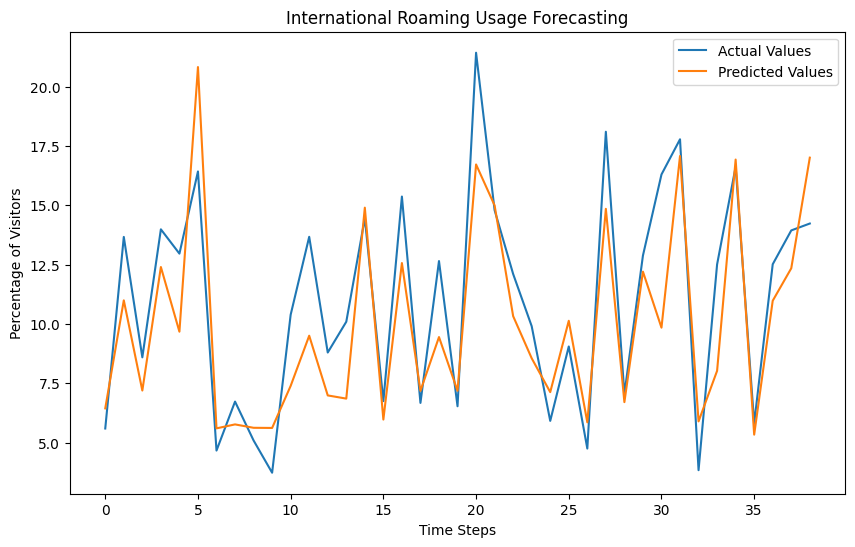

In [79]:
# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Percentage of Visitors')
plt.title('International Roaming Usage Forecasting')
plt.show()
